 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
# review cleansed dataframe
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_path = Path('./Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col ="Date", parse_dates = True, infer_datetime_format=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [14]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.head()

C:\Users\heyuh\AppData\Local\Temp\ipykernel_16936\1614991635.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Calculate Daily Returns
daily_return_sp500 = sp500_df.pct_change()
daily_return_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
daily_return_sp500 = daily_return_sp500.dropna().copy()
daily_return_sp500.isnull().sum()

Close    0
dtype: int64

In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={"Close": "Close_SP500"})
sp500_df.head()

,Close_SP500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_return_sp500], axis="columns", join="inner")
combined_df.columns = ['Soros', 'Paulson','Tiger','Berkshire','Algo1','Algo2','SP500']
combined_df.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [16]:
combined_df.tail()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

---

## Performance Anlysis

#### Calculate and Plot the daily returns.

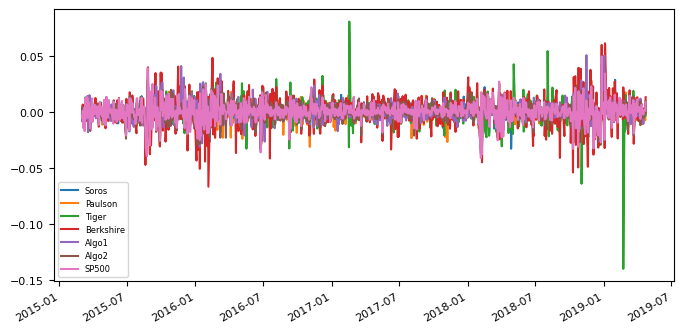

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(legend=True, fontsize =8, figsize = (8,4), xlabel='')
plt.legend(loc='lower left', prop={'size':6})

#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.tail()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Date,,,,,,,
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986
2019-04-22,1.156280,0.776939,0.855652,1.533046,1.925124,1.257151,1.373375
2019-04-23,1.164568,0.779646,0.861189,1.553401,1.934691,1.269247,1.385517


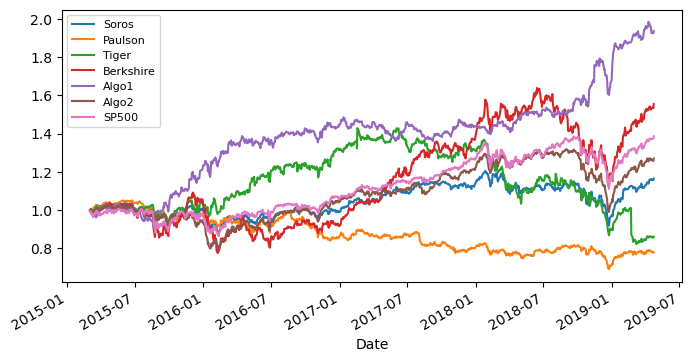

In [19]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (8,4))
plt.legend(loc='upper left', prop={'size':8})

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

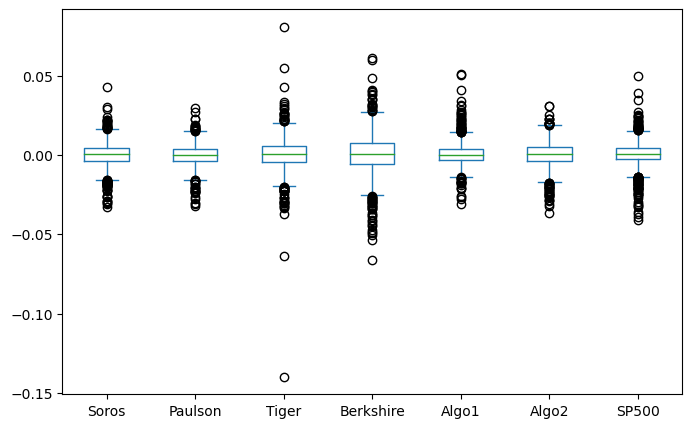

In [20]:
# Box plot to visually show risk
combined_df.plot.box(figsize = (8,5))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
sd=combined_df.std().sort_values()
sd

Paulson      0.007023
Algo1        0.007620
Soros        0.007895
Algo2        0.008342
SP500        0.008554
Tiger        0.010894
Berkshire    0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sd_sp500=sd['SP500']

# Determine which portfolios are riskier than the S&P 500
riskier=sd.loc[sd.iloc[:]>sd_sp500]
riskier

Tiger        0.010894
Berkshire    0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)
ann_sd = sd*np.sqrt(252)
ann_sd

Paulson      0.111488
Algo1        0.120967
Soros        0.125335
Algo2        0.132430
SP500        0.135786
Tiger        0.172936
Berkshire    0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

r21_std = combined_df.rolling(window = 21).std()
r21_std

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


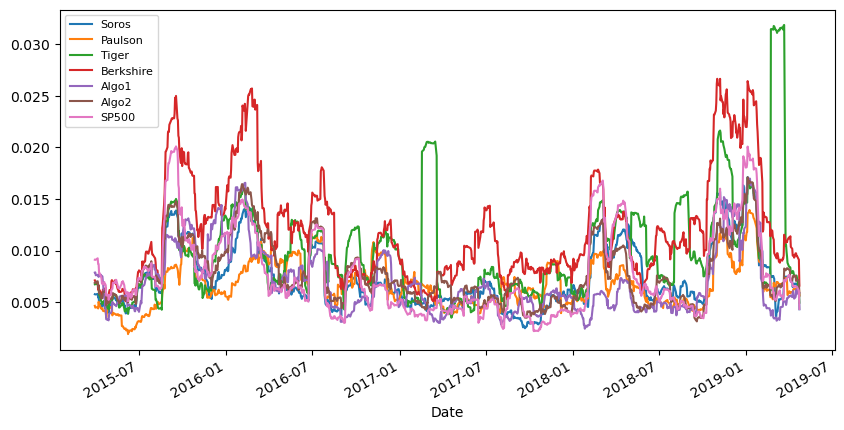

In [32]:
# Plot the rolling standard deviation
r21_std.plot(figsize=(10,5))
plt.legend(loc='upper left', prop={'size':8})

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

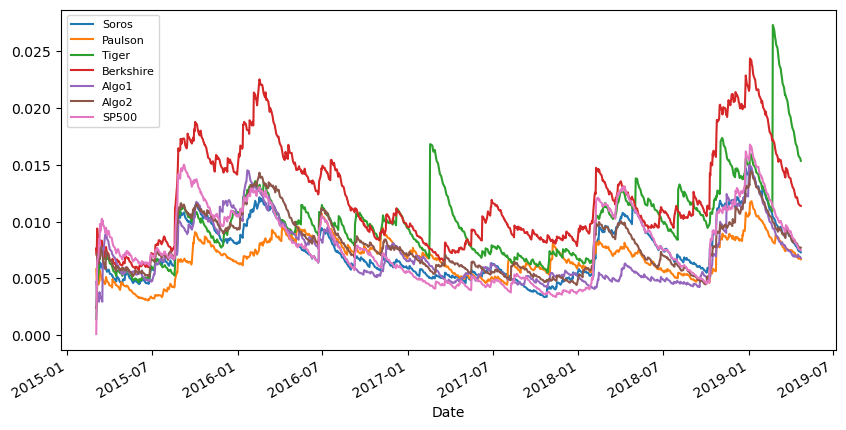

In [59]:
# Use `ewm` to calculate the rolling window
r21_std_ewm = combined_df.ewm(halflife = 21).std()
r21_std_ewm.plot(figsize=(10,5))
plt.legend(loc='upper left', prop={'size':8})

### Calculate and plot the correlation

In [33]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berkshire,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

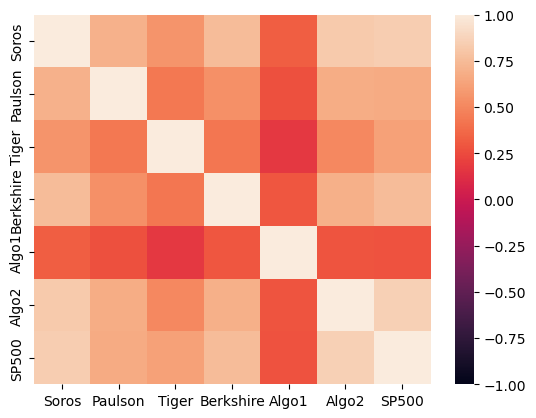

In [34]:
# plot the correlation
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [50]:
# Calculate covariance of a single portfolio
rolling_covariance =combined_df['Soros'].rolling(window=30).cov(combined_df['SP500'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000039
2019-04-18    0.000036
2019-04-22    0.000035
2019-04-23    0.000031
Length: 1043, dtype: float64

In [51]:
# Calculate variance of S&P 500
rolling_variance = combined_df['SP500'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000043
2019-04-17    0.000041
2019-04-18    0.000038
2019-04-22    0.000037
2019-04-23    0.000033
Name: SP500, Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}, xlabel='Date'>

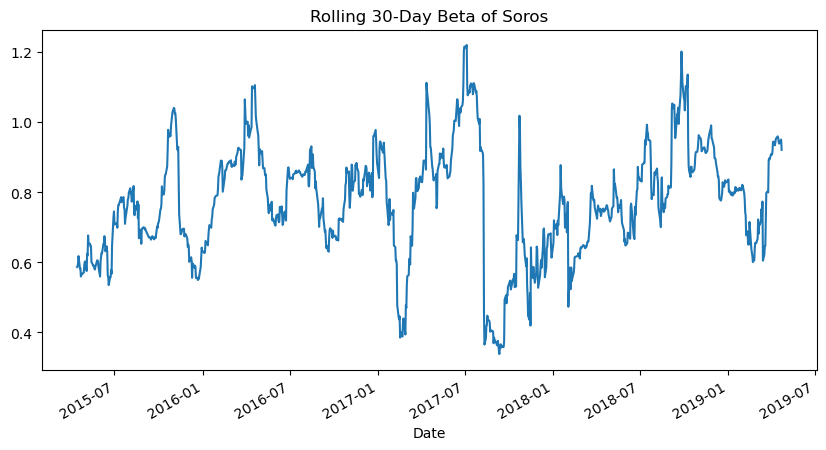

In [54]:
# Computing beta
beta_Soros = rolling_covariance / rolling_variance

# Plot beta trend
beta_Soros.plot(figsize=(10, 5), title='Rolling 30-Day Beta of Soros')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [63]:
# Annualized Sharpe Ratios

sharpe_ratios = combined_df.mean()*252/ ann_sd
sharpe_ratios.sort_values()

Paulson     -0.483570
Tiger       -0.121060
Soros        0.356417
Algo2        0.501364
Berkshire    0.621810
SP500        0.648267
Algo1        1.378648
dtype: float64

<AxesSubplot:>

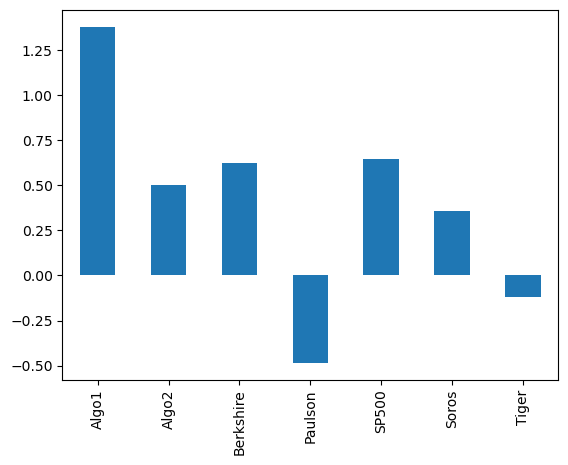

In [65]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [20]:
# Reading data from 1st stock
aapl = pd.read_csv('./Resources/aapl_historical.csv',index_col ="Trade DATE", dayfirst = True, parse_dates = True, infer_datetime_format = True)
aapl.drop('Symbol',axis=1, inplace=True)
aapl = aapl.rename(columns={
    "NOCP": "aapl"
})
aapl.head()

C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/31/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/28/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/27/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/26/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib

,aapl
Trade DATE,
2019-09-05,200.72
2019-08-05,202.90
2019-07-05,202.86
2019-06-05,208.48
2019-03-05,211.75


In [22]:
# Reading data from 2nd stock
goog = pd.read_csv('./Resources/aapl_historical.csv',index_col ="Trade DATE", dayfirst = True, parse_dates = True, infer_datetime_format = True)
goog.drop('Symbol',axis=1, inplace=True)
goog = goog.rename(columns={
    "NOCP": "goog"
})
goog.head()

C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/31/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/28/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/27/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '12/26/2018' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\heyuh\anaconda3\lib

,goog
Trade DATE,
2019-09-05,200.72
2019-08-05,202.90
2019-07-05,202.86
2019-06-05,208.48
2019-03-05,211.75


In [23]:
# Combine all stocks in a single DataFrame
new_df = pd.concat([aapl,goog], axis = "columns", join = "inner")
new_df.head()

,aapl,goog
Trade DATE,,
2019-09-05,200.72,200.72
2019-08-05,202.90,202.90
2019-07-05,202.86,202.86
2019-06-05,208.48,208.48
2019-03-05,211.75,211.75


In [24]:
# Reset Date index
new_df.index = pd.to_datetime(new_df.index)
new_df.index

DatetimeIndex(['2019-09-05', '2019-08-05', '2019-07-05', '2019-06-05',
               '2019-03-05', '2019-02-05', '2019-01-05', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-11-05'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [25]:
# Reorganize portfolio data by having a column per symbol
new_df.head()

,aapl,goog
Trade DATE,,
2019-09-05,200.72,200.72
2019-08-05,202.90,202.90
2019-07-05,202.86,202.86
2019-06-05,208.48,208.48
2019-03-05,211.75,211.75


In [26]:
# Calculate daily returns
new_daily_rtn = new_df.pct_change()

# Drop NAs
new_daily_rtn = new_daily_rtn.dropna()

# Display sample data
new_daily_rtn

,aapl,goog
Trade DATE,,
2019-08-05,0.010861,0.010861
2019-07-05,-0.000197,-0.000197
2019-06-05,0.027704,0.027704
2019-03-05,0.015685,0.015685
2019-02-05,-0.012279,-0.012279
...,...,...
2018-05-17,0.003650,0.003650
2018-05-16,0.006364,0.006364
2018-05-15,-0.009246,-0.009246


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/2, 1/2]

# Calculate portfolio return
portfolio_return = new_daily_rtn.dot(weights)

# Display sample data
portfolio_return 

Trade DATE
2019-08-05    0.010861
2019-07-05   -0.000197
2019-06-05    0.027704
2019-03-05    0.015685
2019-02-05   -0.012279
                ...   
2018-05-17    0.003650
2018-05-16    0.006364
2018-05-15   -0.009246
2018-05-14    0.009172
2018-11-05    0.002339
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
everything = pd.concat([combined_df, portfolio_return], axis = "columns", join = "inner")
everything = everything.rename(columns = {0:"Custom_made"})
everything.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500,Custom_made
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,-0.028401
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112,-0.008810
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034,0.071043
2018-02-07,-0.001689,0.002048,-0.007242,-0.005467,-0.001485,0.001598,-0.005002,0.017725
2018-02-08,-0.026591,-0.023493,-0.029651,-0.044806,-0.005913,-0.025095,-0.037536,-0.002885


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
everything = everything.dropna()
everything.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500,Custom_made
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,-0.028401
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.001112,-0.008810
2018-01-11,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.007034,0.071043
2018-02-07,-0.001689,0.002048,-0.007242,-0.005467,-0.001485,0.001598,-0.005002,0.017725
2018-02-08,-0.026591,-0.023493,-0.029651,-0.044806,-0.005913,-0.025095,-0.037536,-0.002885


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
everything_cumprod = (1 + everything).cumprod() - 1
everything_cumprod.head()

,Soros,Paulson,Tiger,Berkshire,Algo1,Algo2,SP500,Custom_made
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,-0.028401
2018-01-10,0.001708,-0.006020,-0.000664,-0.001362,0.005226,0.000433,0.000548,-0.036961
2018-01-11,0.012266,0.005681,-0.002725,0.016276,-0.000418,0.017339,0.007586,0.031457
2018-02-07,0.010556,0.007741,-0.009948,0.010720,-0.001902,0.018965,0.002546,0.049739
2018-02-08,-0.016315,-0.015934,-0.039304,-0.034567,-0.007804,-0.006607,-0.035086,0.046711


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!